In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense,Activation,LeakyReLU,Embedding,Flatten
from keras.activations import sigmoid,relu

Using TensorFlow backend.


In [2]:
ds=pd.read_csv('../Churn_Modelling.csv')

In [3]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=ds.iloc[:,3:-1]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y=ds.iloc[:,-1]

In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Handle Categorical Variables

In [8]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [9]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [11]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


### Concat Variables with main data frame

In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


### Drop Feature Geography & Gender

In [14]:
X.drop(columns=['Geography','Gender'],axis=1,inplace=True)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Train Test Split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=22)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [19]:
X_train=ss.fit_transform(X_train)

In [20]:
X_test=ss.transform(X_test)

In [21]:
# def create_model(layers, activation):
#     model = Sequential()
#     for i, nodes in enumerate(layers):
#         if i==0:
#             model.add(Dense(nodes,input_dim=X_train.shape[1]))
#             model.add(Activation(activation))
#             model.add(Dropout(0.3))
#         else:
#             model.add(Dense(nodes))
#             model.add(Activation(activation))
#             model.add(Dropout(0.3))
            
#     model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
#     model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#     return model
    
# model = KerasClassifier(build_fn=create_model, verbose=0)



In [22]:
# layers = [[20], [40, 20], [45, 30, 15]]
# activations = ['sigmoid', 'relu']
# param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

# grid_result = grid.fit(X_train, y_train)

### Lets Start building ANN

### Initialize ANN

In [23]:
classifier=Sequential()

### Adding Input Layer and First Hidden Layer in ANN

In [24]:
classifier.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu',input_dim=11))

### Add Dropuout Layer

In [25]:
#classifier.add(Dropout(0.3))

### Second Hidden Layer

In [26]:
classifier.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))

### Add Dropout

In [27]:
#classifier.add(Dropout(0.2))

### Third Hidden Layer

In [28]:
#classifier.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))

### Output layer

In [29]:
classifier.add(Dense(kernel_initializer="glorot_uniform", activation="sigmoid", units=1))

In [30]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### Compiling ANN

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fitting ANN to training DataSet

In [32]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 108us/step - loss: 0.6532 - accuracy: 0.6837 - val_loss: 0.5433 - val_accuracy: 0.7747
Epoch 2/100
5359/5359 [==============================] - 0s 87us/step - loss: 0.4984 - accuracy: 0.7955 - val_loss: 0.4977 - val_accuracy: 0.7883
Epoch 3/100
5359/5359 [==============================] - 0s 88us/step - loss: 0.4655 - accuracy: 0.8033 - val_loss: 0.4750 - val_accuracy: 0.7914
Epoch 4/100
5359/5359 [==============================] - 0s 74us/step - loss: 0.4472 - accuracy: 0.8071 - val_loss: 0.4601 - val_accuracy: 0.7948
Epoch 5/100
5359/5359 [==============================] - 0s 78us/step - loss: 0.4352 - accuracy: 0.8097 - val_loss: 0.4519 - val_accuracy: 0.7970
Epoch 6/100
5359/5359 [==============================] - 0s 80us/step - loss: 0.4276 - accuracy: 0.8130 - val_loss: 0.4409 - val_accuracy: 0.7993
Epoch 7/100
5359/5359 [==============================] - 0s 86us/step - los

In [33]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


### Validate with test Data

In [34]:
# Predicting the Test set results
y_pred=classifier.predict(X_test)

In [35]:
y_pred=(y_pred>0.5)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
confusion_matrix(y_test,y_pred)

array([[1286,  318],
       [ 117,  279]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred)

0.7825

### summarize history for loss

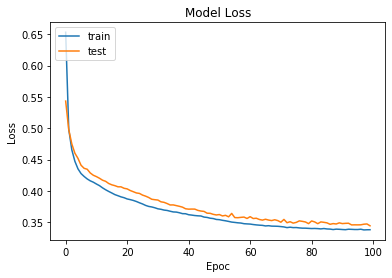

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epoc')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()